# Bağlantı ve Yüklemeler

In [ ]:
from google.colab import drive
drive.mount("/gdrive")
%cd /gdrive

Mounted at /gdrive
/gdrive


In [ ]:
!ls "/gdrive/MyDrive/Calisma_ortami/yeni_maaslar.csv"

/gdrive/MyDrive/Calisma_ortami/yeni_maaslar.csv


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [ ]:
dataFrame = pd.read_csv("/gdrive/MyDrive/Calisma_ortami/yeni_maaslar.csv")

# Veriyi KontroL Etme

In [ ]:
dataFrame

,Calisan ID,unvan,UnvanSeviyesi,Kidem,Puan,maas
0,1,Cayci,1,5,70,2250
1,2,Sekreter,2,5,70,2500
2,3,Uzman Yardimcisi,3,5,70,3000
3,4,Uzman,4,5,70,4000
4,5,Proje Yoneticisi,5,5,70,5500
5,6,Sef,6,5,70,7500
6,7,Mudur,7,5,70,10000
7,8,Direktor,8,5,70,15000
8,9,C-level,9,5,70,25000
9,10,CEO,10,5,70,50000


In [ ]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Calisan ID     30 non-null     int64 
 1   unvan          30 non-null     object
 2   UnvanSeviyesi  30 non-null     int64 
 3   Kidem          30 non-null     int64 
 4   Puan           30 non-null     int64 
 5   maas           30 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.5+ KB


In [ ]:
dataFrame.corr()

<ipython-input-8-6bf2272b98ee>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataFrame.corr()


,Calisan ID,UnvanSeviyesi,Kidem,Puan,maas
Calisan ID,1.000000,0.331847,0.206278,-0.251278,0.226287
UnvanSeviyesi,0.331847,1.000000,-0.125200,0.034948,0.727036
Kidem,0.206278,-0.125200,1.000000,0.322796,0.117964
Puan,-0.251278,0.034948,0.322796,1.000000,0.201474
maas,0.226287,0.727036,0.117964,0.201474,1.000000


In [ ]:
dataFrame.describe()

,Calisan ID,UnvanSeviyesi,Kidem,Puan,maas
count,30.000000,30.000000,30.000000,30.000000,30.000000
mean,15.500000,5.500000,5.433333,59.066667,10861.666667
std,8.803408,2.921384,2.686920,25.330823,13468.313281
min,1.000000,1.000000,1.000000,2.000000,2000.000000
25%,8.250000,3.000000,4.000000,44.000000,3000.000000
50%,15.500000,5.500000,5.000000,70.000000,5450.000000
75%,22.750000,8.000000,7.750000,70.000000,12000.000000
max,30.000000,10.000000,10.000000,99.000000,60000.000000


<Figure size 700x700 with 0 Axes>

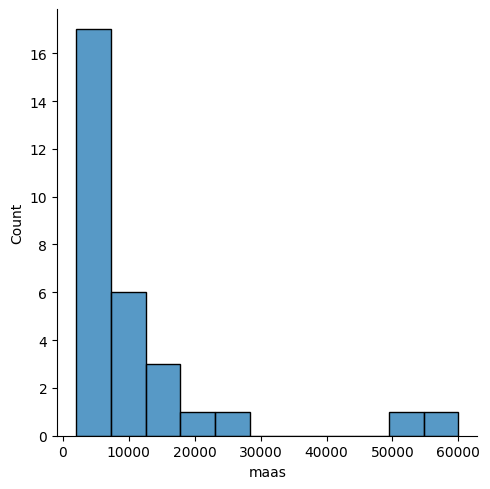

In [ ]:
plt.figure(figsize=[7,7])
sbn.displot(dataFrame["maas"])

<Axes: >

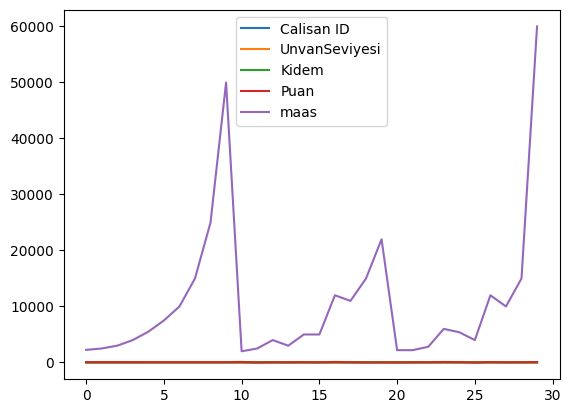

In [ ]:
dataFrame.plot()

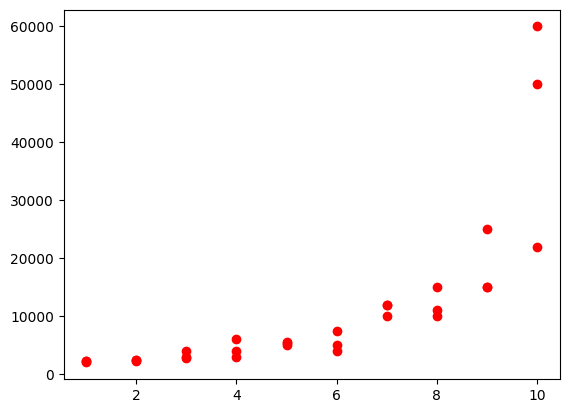

In [ ]:
plt.scatter(dataFrame["UnvanSeviyesi"], dataFrame["maas"].values, color="red")

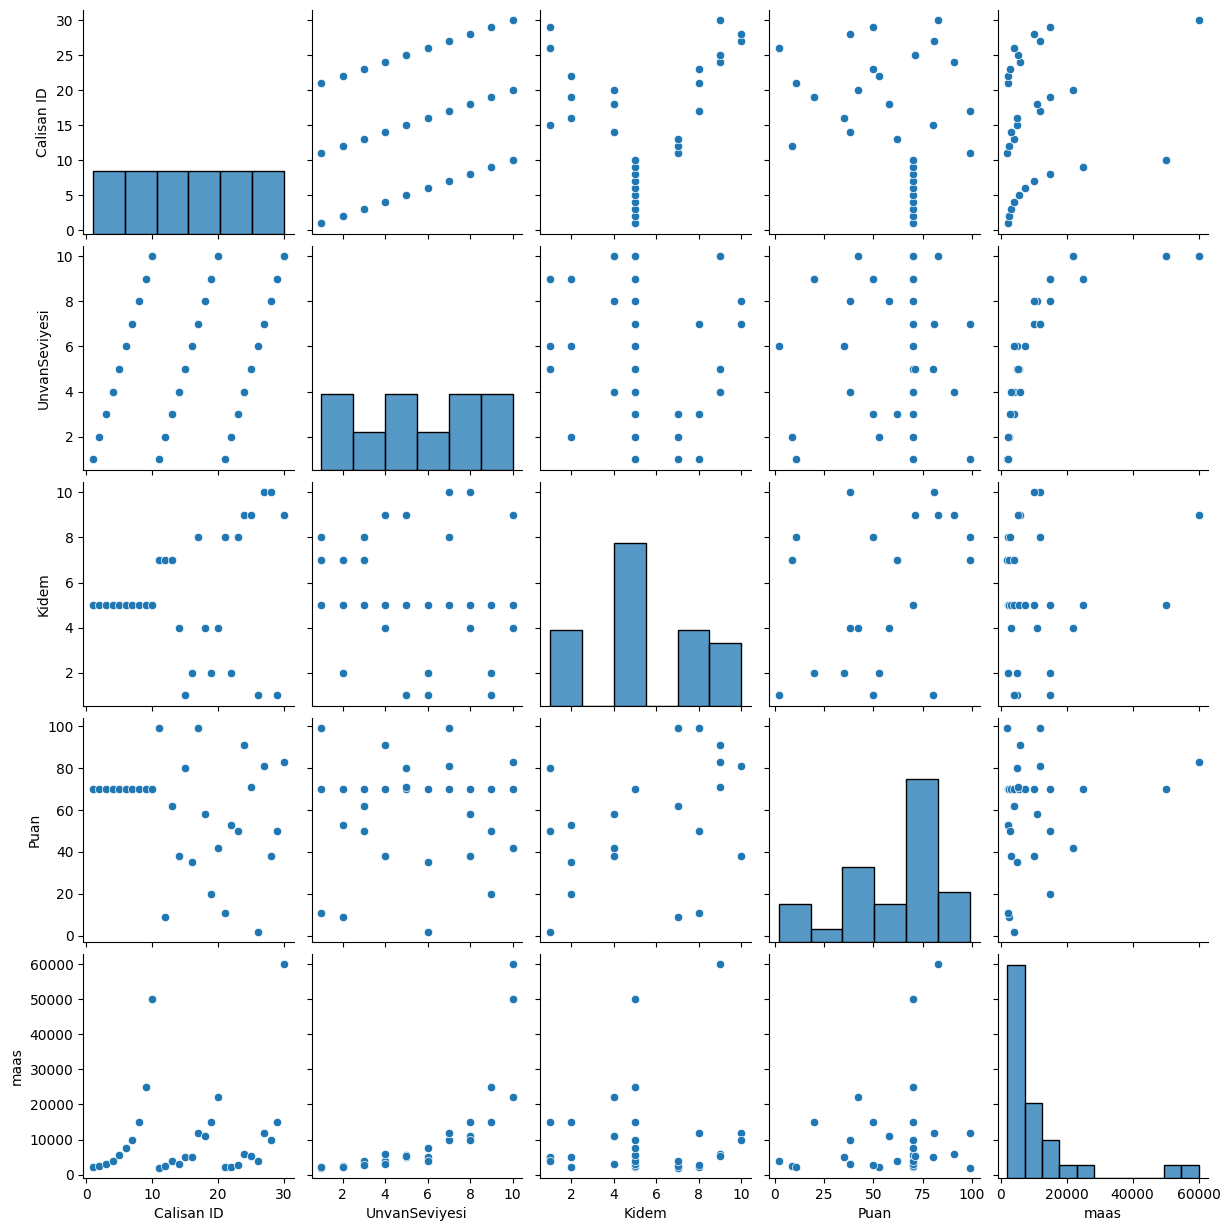

In [ ]:
sbn.pairplot(dataFrame)

In [ ]:
DF = dataFrame.drop(["Calisan ID","unvan"], axis=1)
DF

,UnvanSeviyesi,Kidem,Puan,maas
0,1,5,70,2250
1,2,5,70,2500
2,3,5,70,3000
3,4,5,70,4000
4,5,5,70,5500
5,6,5,70,7500
6,7,5,70,10000
7,8,5,70,15000
8,9,5,70,25000
9,10,5,70,50000


# Veriyi Dikey Eksende Bölme

In [ ]:
x= DF.iloc[:,0:1].values
y=DF.iloc[:,3:].values

# p Value Değeri Bulma

p value değeri için linear regresyon modelinden yararlanacağız. Devamında;
`statsmodel.api` kütüphanesini kullanacağız. Verinin x yani bağımsız değişkenleri ile lineer regresyon yapılarak tahmin edilen tahmini y değerleri OLS(Ordinary Least Squared- Sıradan En Küçük Kareler Yöntemi) kullanılarak oluşan tabloyu inceleyeceğiz. BU tabloda gelen p value depğerlerini inceleyip 1 ve 1 'e yakın değerleri çıkaracağız. Böylelikle tahminlemede işe yaramayacak değerleri çıkarmış olacağız.

# Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
linear_reg= LinearRegression()

In [ ]:
linear_reg.fit(x,y)

LinearRegression()

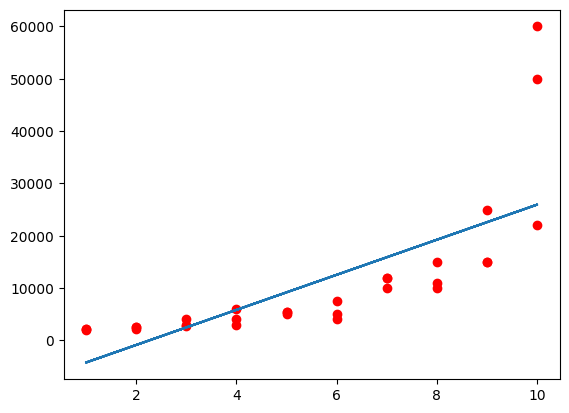

In [ ]:
plt.scatter(x,y, color="red")
plt.plot(x,linear_reg.predict(x))

### Linear OLS

In [ ]:
import statsmodels.api as sm

In [ ]:
model= sm.OLS(linear_reg.predict(x),x)

In [ ]:
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.942
Model:                            OLS   Adj. R-squared (uncentered):              0.940
Method:                 Least Squares   F-statistic:                              468.1
Date:                Mon, 18 Dec 2023   Prob (F-statistic):                    1.93e-19
Time:                        18:53:07   Log-Likelihood:                         -287.43
No. Observations:                  30   AIC:                                      576.9
Df Residuals:                      29   BIC:                                      578.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

## Linear Regression R^2 Square Yöntemi ile Tahminleri Karşılaştırma

In [ ]:
r2_score(y,linear_reg.predict(x))

0.5285811733746243

# Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
polynomial_reg= PolynomialFeatures(degree=4)

In [ ]:
x_poly= polynomial_reg.fit_transform(x)

In [ ]:
print(x_poly)

[[1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00]
 [1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01]
 [1.000e+00 3.000e+00 9.000e+00 2.700e+01 8.100e+01]
 [1.000e+00 4.000e+00 1.600e+01 6.400e+01 2.560e+02]
 [1.000e+00 5.000e+00 2.500e+01 1.250e+02 6.250e+02]
 [1.000e+00 6.000e+00 3.600e+01 2.160e+02 1.296e+03]
 [1.000e+00 7.000e+00 4.900e+01 3.430e+02 2.401e+03]
 [1.000e+00 8.000e+00 6.400e+01 5.120e+02 4.096e+03]
 [1.000e+00 9.000e+00 8.100e+01 7.290e+02 6.561e+03]
 [1.000e+00 1.000e+01 1.000e+02 1.000e+03 1.000e+04]
 [1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00]
 [1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01]
 [1.000e+00 3.000e+00 9.000e+00 2.700e+01 8.100e+01]
 [1.000e+00 4.000e+00 1.600e+01 6.400e+01 2.560e+02]
 [1.000e+00 5.000e+00 2.500e+01 1.250e+02 6.250e+02]
 [1.000e+00 6.000e+00 3.600e+01 2.160e+02 1.296e+03]
 [1.000e+00 7.000e+00 4.900e+01 3.430e+02 2.401e+03]
 [1.000e+00 8.000e+00 6.400e+01 5.120e+02 4.096e+03]
 [1.000e+00 9.000e+00 8.100e+01 7.290e+02 6.56

In [ ]:
linear_reg.fit(x_poly,y)

LinearRegression()

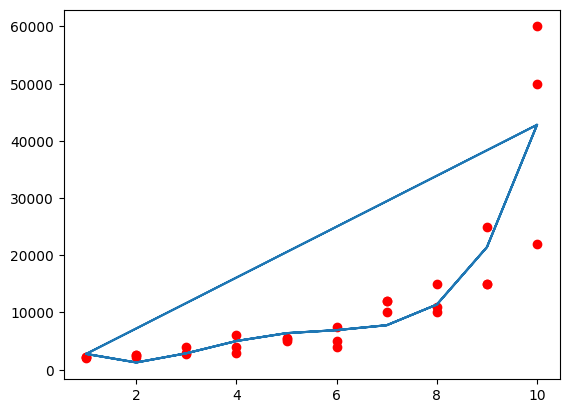

In [ ]:
plt.scatter(x,y, color="red")
plt.plot(x,linear_reg.predict(x_poly))

### Polynomial OLS

In [ ]:
model= sm.OLS(linear_reg.predict(x_poly),x)

In [ ]:
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.759
Model:                            OLS   Adj. R-squared (uncentered):              0.751
Method:                 Least Squares   F-statistic:                              91.39
Date:                Mon, 18 Dec 2023   Prob (F-statistic):                    1.82e-10
Time:                        18:53:55   Log-Likelihood:                         -311.94
No. Observations:                  30   AIC:                                      625.9
Df Residuals:                      29   BIC:                                      627.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

## Polynomial R^2 Square Yöntemi ile Tahminleri Karşılaştırma

In [ ]:
r2_score(y,linear_reg.predict(x_poly))

0.8174873280442536

# SVR Regression

Bundan önce veriyi StandardScaler ile ölçekleyeceğiz.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
x_scaler=scaler.fit_transform(x)
y_scaler=scaler.fit_transform(y)

In [ ]:
from sklearn.svm import SVR

In [ ]:
svr_reg= SVR(kernel="rbf")

In [ ]:
svr_reg.fit(x_scaler,y_scaler)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

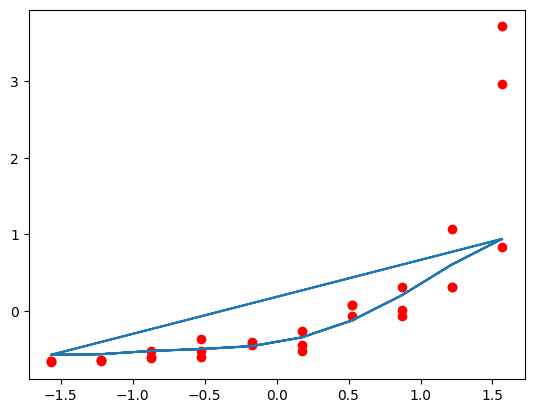

In [ ]:
plt.scatter(x_scaler,y_scaler, color="red")
plt.plot(x_scaler,svr_reg.predict(x_scaler))

### SVR - OLS

In [ ]:
model = sm.OLS(svr_reg.predict(x_scaler),x_scaler)

In [ ]:
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.770
Model:                            OLS   Adj. R-squared (uncentered):              0.762
Method:                 Least Squares   F-statistic:                              97.19
Date:                Mon, 18 Dec 2023   Prob (F-statistic):                    9.11e-11
Time:                        18:54:10   Log-Likelihood:                         -1.3680
No. Observations:                  30   AIC:                                      4.736
Df Residuals:                      29   BIC:                                      6.137
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

## SVR R^2 Square Yöntemi ile Tahminleri Karşılaştırma

In [ ]:
r2_score(y_scaler, svr_reg.predict(x_scaler))

0.5841869084594333

# Decision Tree Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
des_reg = DecisionTreeRegressor(random_state=0)

In [ ]:
des_reg.fit(x,y)

DecisionTreeRegressor(random_state=0)

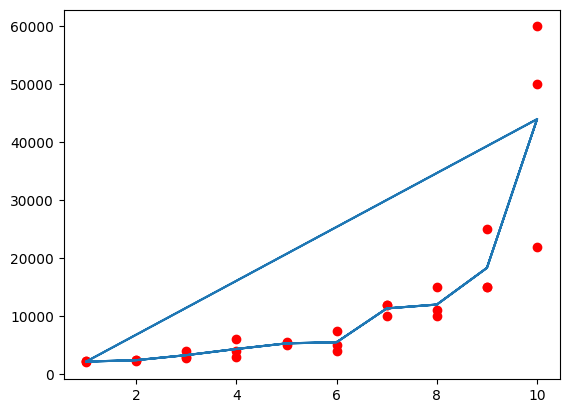

In [ ]:
plt.scatter(x, y, color="red")
plt.plot(x,des_reg.predict(x))

## Decision Tree OLS

In [ ]:
model= sm.OLS(des_reg.predict(x),x)

In [ ]:
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.751
Model:                            OLS   Adj. R-squared (uncentered):              0.742
Method:                 Least Squares   F-statistic:                              87.29
Date:                Mon, 18 Dec 2023   Prob (F-statistic):                    3.01e-10
Time:                        18:54:20   Log-Likelihood:                         -312.62
No. Observations:                  30   AIC:                                      627.2
Df Residuals:                      29   BIC:                                      628.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

## Decision Tree R^2 Square Yöntemi ile Tahminleri Karşılaştırma

In [ ]:
r2_score(y, des_reg.predict(x))

0.8343186200100907

# Random Forets Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rdf_reg= RandomForestRegressor(n_estimators=10, random_state=0)

In [ ]:
rdf_reg.fit(x,y)

<ipython-input-56-2240c6423b6b>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rdf_reg.fit(x,y)


RandomForestRegressor(n_estimators=10, random_state=0)

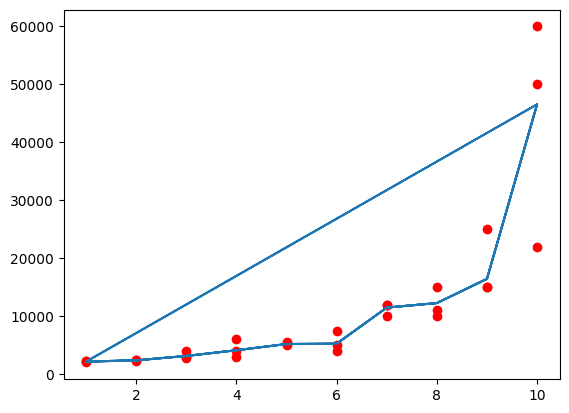

In [ ]:
plt.scatter(x,y , color="red")
plt.plot(x,rdf_reg.predict(x))

## Random Forest OLS

In [ ]:
model = sm.OLS(rdf_reg.predict(x),x)

In [ ]:
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.719
Model:                            OLS   Adj. R-squared (uncentered):              0.709
Method:                 Least Squares   F-statistic:                              74.13
Date:                Mon, 18 Dec 2023   Prob (F-statistic):                    1.75e-09
Time:                        18:54:29   Log-Likelihood:                         -315.35
No. Observations:                  30   AIC:                                      632.7
Df Residuals:                      29   BIC:                                      634.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

## Random Forest R^2 Square Yöntemi ile Tahminleri Karşılaştırma

In [ ]:
r2_score(y, rdf_reg.predict(x))

0.8284081476481634